In [67]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [68]:
n = 300
m = 1000
A = np.random.randn(m, n)
b = np.random.randn(m)
np.linalg.cond(A)

3.255139592526874

In [69]:
U, s, V = np.linalg.svd(A, full_matrices=True)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)
S = S**2

A = np.dot(U, np.dot(S, V))
np.linalg.cond(A)

10.595933766836035

In [70]:
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, b)

In [71]:
eps = 1e-10

In [72]:
def quad_grad(y):
    return np.dot(AtA, y) - Atb

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 3.13e-07
iter num 100, norm(Gk)/(1+norm(xk)): 1.83e-01, step-size: 3.22e-07
iter num 200, norm(Gk)/(1+norm(xk)): 8.71e-06, step-size: 2.99e-07
iter num 300, norm(Gk)/(1+norm(xk)): 9.64e-10, step-size: 1.66e-07
iter num 322, norm(Gk)/(1+norm(xk)): 9.91e-11, step-size: 2.06e-07
terminated


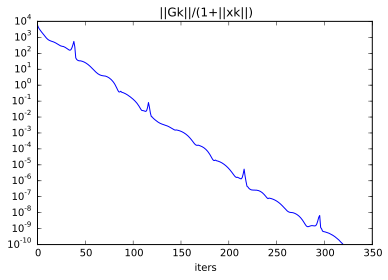

In [73]:
x = apg.solve(quad_grad, {}, n, eps = eps)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 3.13e-07
iter num 100, norm(Gk)/(1+norm(xk)): 1.00e+02, step-size: 5.61e-07
iter num 200, norm(Gk)/(1+norm(xk)): 1.99e+01, step-size: 3.19e-07
iter num 300, norm(Gk)/(1+norm(xk)): 2.84e+00, step-size: 1.57e-07
iter num 400, norm(Gk)/(1+norm(xk)): 7.14e-01, step-size: 4.24e-07
iter num 500, norm(Gk)/(1+norm(xk)): 1.32e-01, step-size: 2.81e-07
iter num 600, norm(Gk)/(1+norm(xk)): 2.14e-02, step-size: 1.59e-07
iter num 700, norm(Gk)/(1+norm(xk)): 5.48e-03, step-size: 4.31e-07
iter num 800, norm(Gk)/(1+norm(xk)): 1.25e-03, step-size: 2.86e-07
iter num 900, norm(Gk)/(1+norm(xk)): 2.26e-04, step-size: 2.03e-07
iter num 1000, norm(Gk)/(1+norm(xk)): 4.09e-05, step-size: 5.50e-07
iter num 1100, norm(Gk)/(1+norm(xk)): 1.39e-05, step-size: 3.15e-07
iter num 1200, norm(Gk)/(1+norm(xk)): 3.00e-06, step-size: 2.30e-07
iter num 1300, norm(Gk)/(1+norm(xk)): 5.99e-07, step-size: 1.68e-07
iter num 1400, norm(Gk)/(1+norm(xk)): 1.44e-07, step-size: 4.54e-

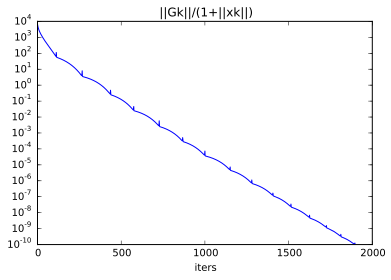

In [74]:
x_no_accleration = apg.solve(quad_grad, {}, n, eps = eps, use_gra=True, max_iters=10000)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 3.13e-07
iter num 100, norm(Gk)/(1+norm(xk)): 4.14e+01, step-size: 1.78e-07
iter num 200, norm(Gk)/(1+norm(xk)): 7.07e+00, step-size: 1.83e-07
iter num 300, norm(Gk)/(1+norm(xk)): 2.69e+00, step-size: 1.54e-07
iter num 400, norm(Gk)/(1+norm(xk)): 6.56e-01, step-size: 1.47e-07
iter num 500, norm(Gk)/(1+norm(xk)): 3.53e-01, step-size: 1.67e-07
iter num 600, norm(Gk)/(1+norm(xk)): 1.30e-01, step-size: 1.58e-07
iter num 700, norm(Gk)/(1+norm(xk)): 7.49e-02, step-size: 1.61e-07
iter num 800, norm(Gk)/(1+norm(xk)): 2.55e-02, step-size: 1.59e-07
iter num 900, norm(Gk)/(1+norm(xk)): 1.40e-02, step-size: 1.54e-07
iter num 1000, norm(Gk)/(1+norm(xk)): 5.57e-03, step-size: 1.84e-07
iter num 1100, norm(Gk)/(1+norm(xk)): 2.19e-03, step-size: 1.90e-07
iter num 1200, norm(Gk)/(1+norm(xk)): 1.11e-03, step-size: 2.19e-07
iter num 1300, norm(Gk)/(1+norm(xk)): 7.41e-04, step-size: 2.20e-07
iter num 1400, norm(Gk)/(1+norm(xk)): 3.50e-04, step-size: 2.30e-

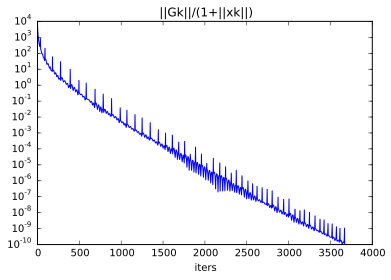

In [75]:
x_no_restart = apg.solve(quad_grad, {}, n, eps = eps, use_restart=False, max_iters=10000)

In [76]:
def cg(A, b, x=False, eps=1e-12, gen_plots=True):
    n = np.shape(A)[0]
    if not x:
        x = np.zeros(n)
    r = b - np.dot(A, x)
    p = np.copy(r)
    rsold = np.linalg.norm(r)**2

    max_iters = 10 * n # cg should only need n steps
    if gen_plots:
        errs = np.zeros(max_iters)
        import matplotlib.pyplot as plt

    k = 0
    for k in range(max_iters):
        Ap = np.dot(A, p)
        alpha = rsold / np.inner(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.linalg.norm(r)**2
        err = rsnew**0.5 / (1 + np.linalg.norm(x))
        if gen_plots:
            errs[k] = err

        if err < eps:
              break
        p = r + p * (rsnew / rsold)
        rsold=rsnew
        
    if gen_plots:
        errs = errs[1:k]
        plt.semilogy(errs[1:k])
        plt.xlabel('iters')
        plt.title('||rk|| / (1 + ||xk||')

    return x

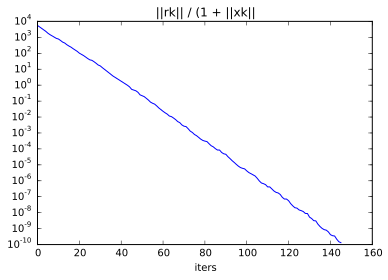

In [77]:
x_cg = cg(AtA, Atb, eps = eps)

In [78]:
np.linalg.norm(x - x_cg) / np.linalg.norm(x_cg)

5.0870931079109217e-14

In [79]:
np.linalg.norm(np.dot(A,x) - b)

25.67848797673177

In [80]:
np.linalg.norm(np.dot(A,x_cg) - b)

25.678487976731777

In [81]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(cp.norm(A * z - b))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS, eps=1e-12)
x_scs = z.value.A1
np.linalg.norm(np.dot(A,x_scs) - b)

----------------------------------------------------------------------------
	SCS v1.1.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 300001
eps = 1.00e-12, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 301, constraints m = 1001
Cones:	soc vars: 1001, soc blks: 1
Setup time: 1.00e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  3.86e-03 
   100|      inf       inf       nan      -inf       inf       inf  1.01e-01 
   200|      inf       inf       nan      -inf       inf       inf  2.01e-01 
   300|      inf       inf       nan       inf       inf       inf  2.99e-01 


25.678487976731741

In [82]:
np.linalg.norm(x_scs - x_cg) / np.linalg.norm(x_cg)

1.3861341793187094e-12

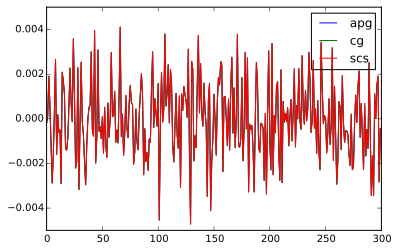

In [83]:
plt.plot(x, label='apg')
plt.plot(x_cg, label='cg')
plt.plot(x_scs, label='scs')
plt.legend()